In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
#to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
#for normalizing the data 
from sklearn.preprocessing import StandardScaler
#principal component analysis
from sklearn.decomposition import PCA
#for clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix



In [2]:
df=pd.read_csv("marketing_campaign_final.csv",sep=";")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#removing the rows that have any kind of null value
df=df.dropna()

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#checking if there is any duplicate data
df.duplicated().sum()

0

In [8]:
#Getting information about the each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [9]:
#changing the Dt_customer feature into DateTime as it isn't in that format
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [11]:
#To creating a new feature(Age) from the Year_Birth column
df["Age"]=2024-df["Year_Birth"]

In [12]:
#Creting feature(Total_spent) represeting the total amount spent 
df["Total_spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [13]:
#creating feature(Living_Category)
df["Living_category"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone","YOLO":"Alone","Divorced":"Alone","Single":"Alone"})

In [14]:
#creating featur(Children) for count of the kids
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [15]:
#creating a feture to reprsent the number of members in the family 
df['Family_Size'] = df['Living_category'].replace({'Alone':1, 'Partner':2}) + df['Children']

In [16]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [17]:
df['Is_Parent']=np.where(df.Children > 0, 1, 0)

In [18]:
#dropping features that are not necessary
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df=df.drop(to_drop, axis=1)

In [19]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Age  Total_spent  Living_category  \
0             0         0         1   67         1617            Alone   
1             0         0         0   70           27            Alone   
2             0         0         0   59          776          Partner   
3             0         0         0   40           53          Partner   
4             0         0         0   43          422          Partner   

   Children  Family_Size  Is_Parent  
0         0            1          0  
1         2            3          1  
2         0            2          0  
3         1            3          1  
4         1            3          1  

[5 rows x 29 columns]

In [20]:
#Data Anslysis with the Help of Data Visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [21]:
#to get statistical summary of each column
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean      43.965253  ...      0.073105      0.064079      0.013538   
std       51.815414  ...      0.260367      0.244950      0.115588   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        9.000000  ...      0.000000      0.000000      0.000000   
50%       24.500000  ...      0.000000      0.000000      0.000000   
75%       56.000000  ...      0.000000      0.000000      0.000000   
max      321.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response          Age  Total_spent     Children  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.009477     0.150271    55.179603   607.075361     0.947202   
std       0.096907     0.357417    11.985554   602.900476     0.749062   
min       0.000000     0.000000    28.000000     5.000000     0.000000   
25%       0.000000     0.000000    47.000000    69.000000     0.000000   
50%       0.000000     0.000000    54.000000   396.500000     1.000000   
75%       0.000000     0.000000    65.000000  1048.000000     1.000000   
max       1.000000     1.000000   131.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 27 columns]

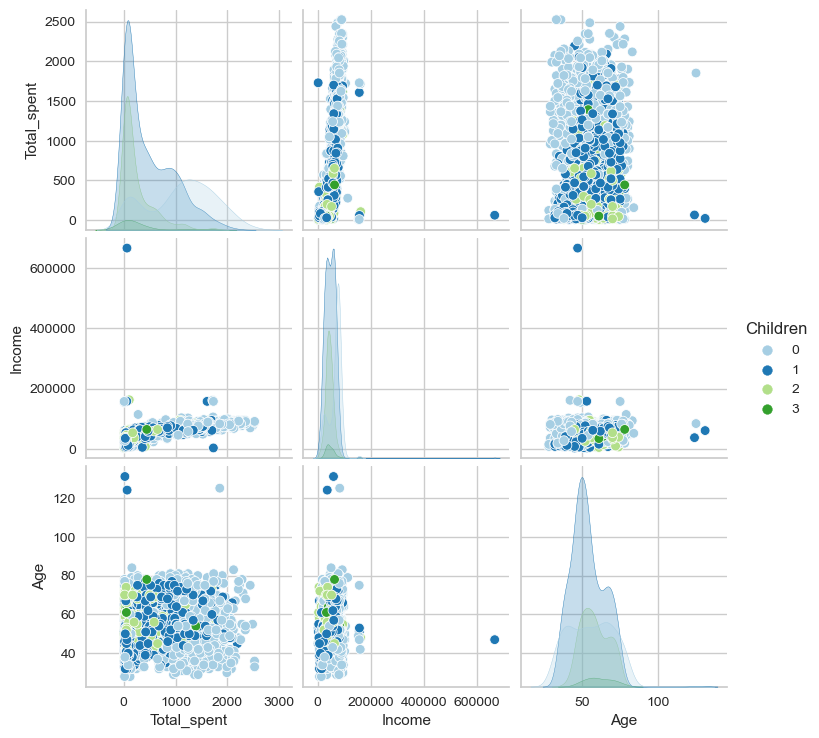

In [22]:
sns.pairplot(df,vars=["Total_spent","Income","Age"], hue="Children", palette='Paired')

<Axes: xlabel='Total_spent', ylabel='Income'>

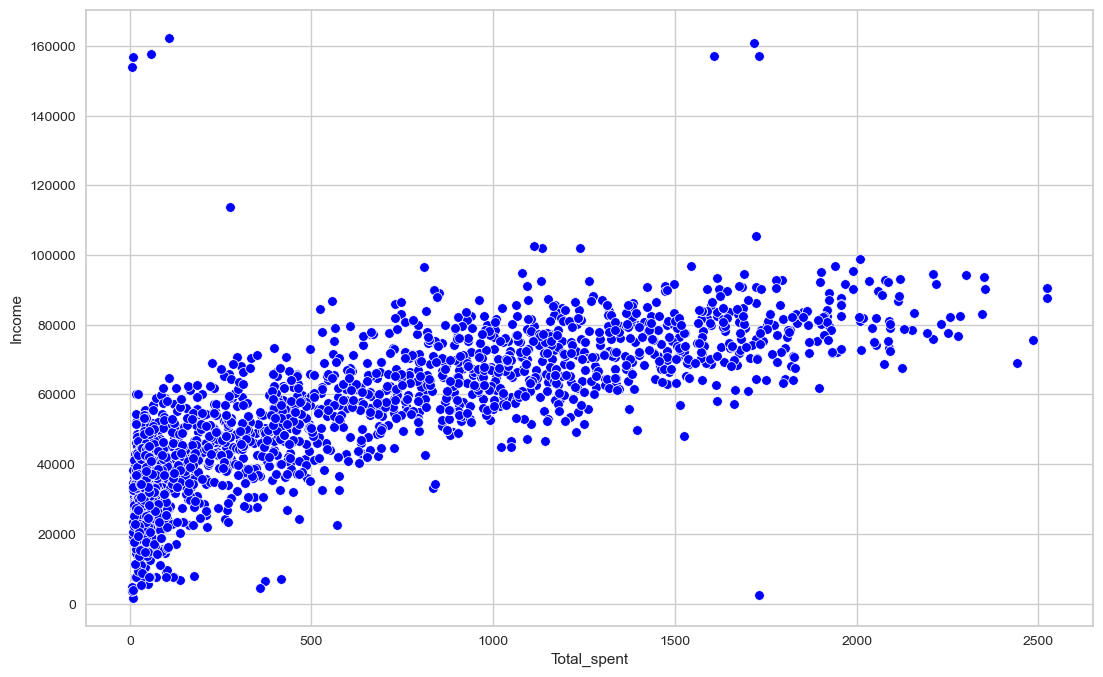

In [23]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<600000]['Total_spent'],y=df[df['Income']<600000]['Income'],color='Blue')

<Axes: xlabel='Total_spent', ylabel='Age'>

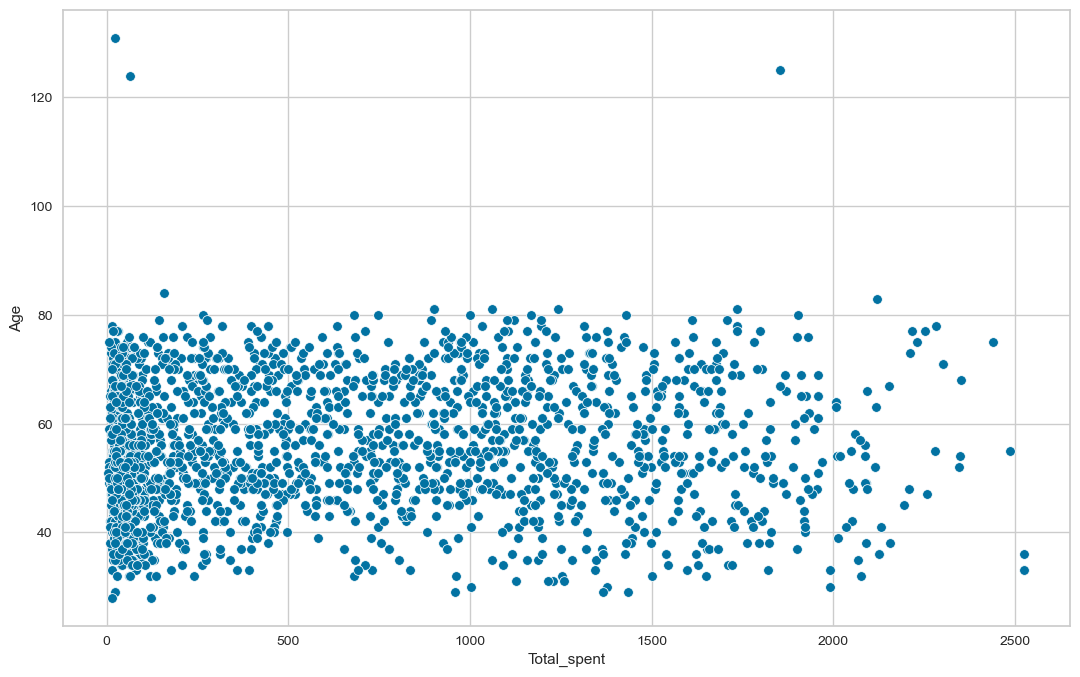

In [24]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Total_spent'],y=df['Age'])

<Axes: xlabel='Total_spent', ylabel='Count'>

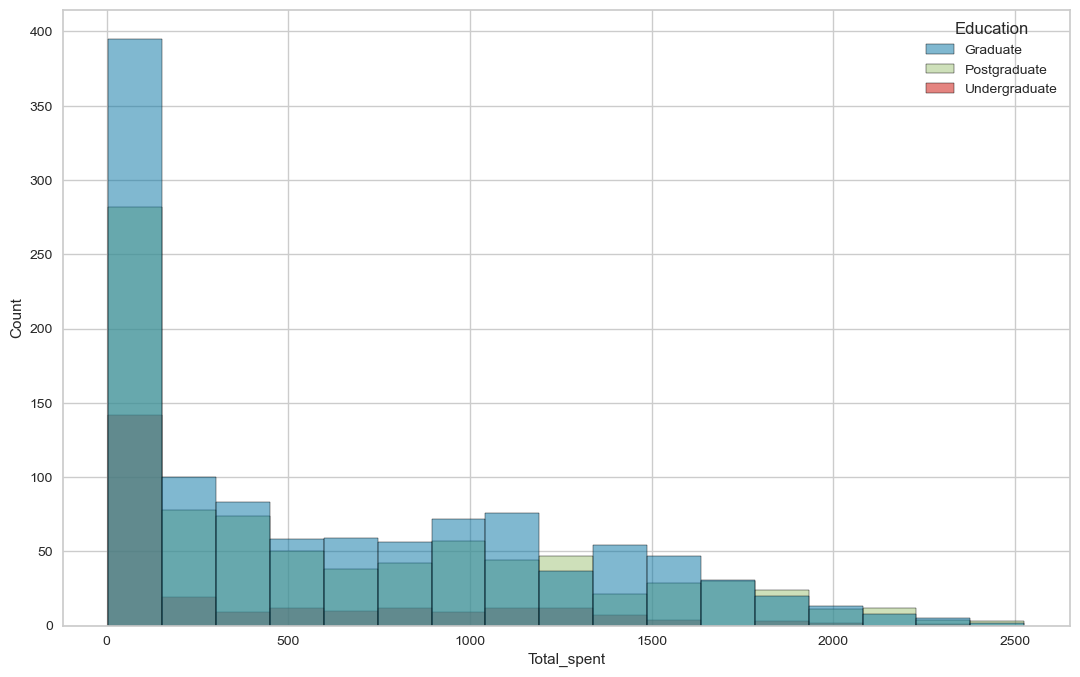

In [25]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Total_spent'],hue=df['Education'])

<Axes: xlabel='Age', ylabel='Density'>

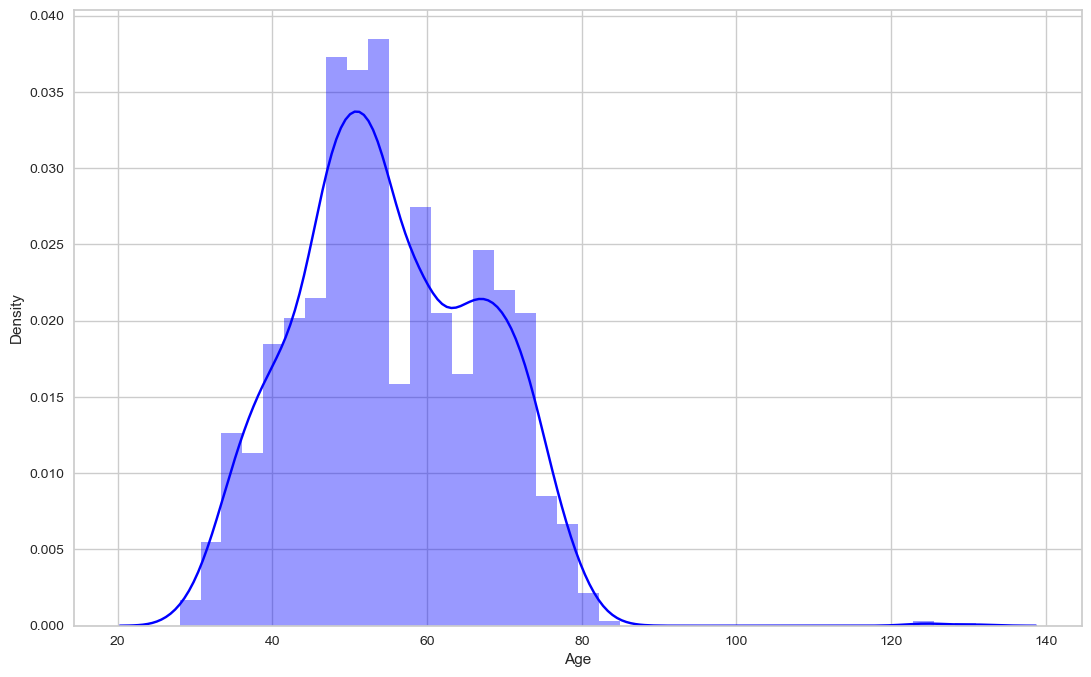

In [26]:
#We will detect the the outliers in the data since it reduce the effeciency and accracy of the model
plt.figure(figsize=(13,8))
sns.distplot(df.Age,color="blue")

<Axes: xlabel='Income', ylabel='Density'>

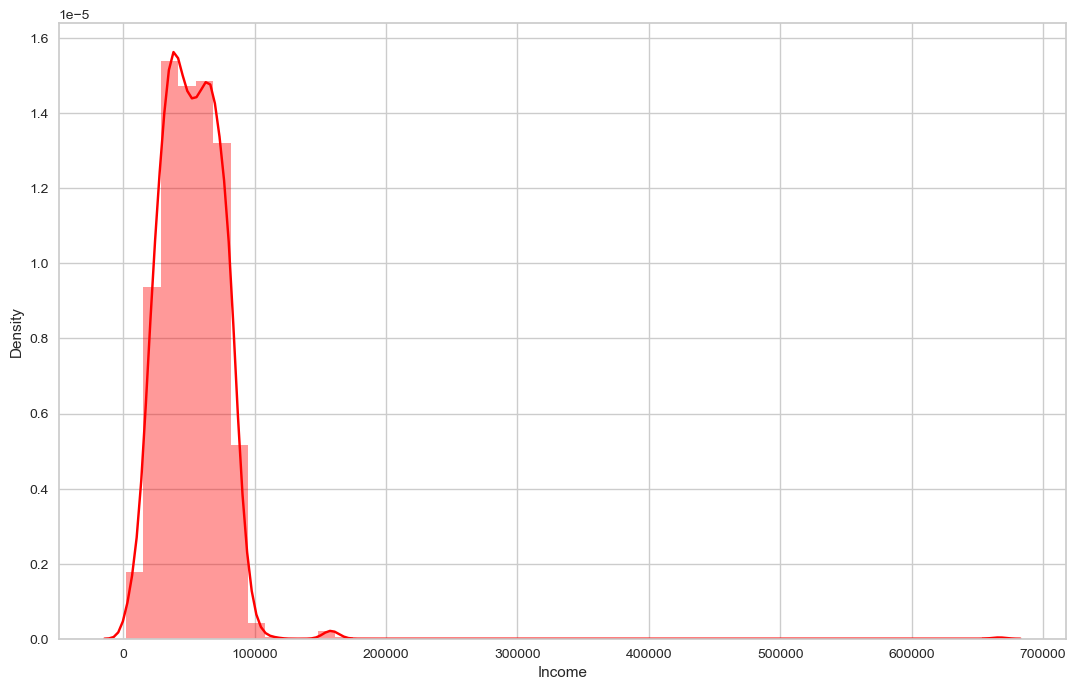

In [27]:
plt.figure(figsize=(13,8))
sns.distplot(df.Income,color="red")

<Axes: xlabel='Total_spent', ylabel='Density'>

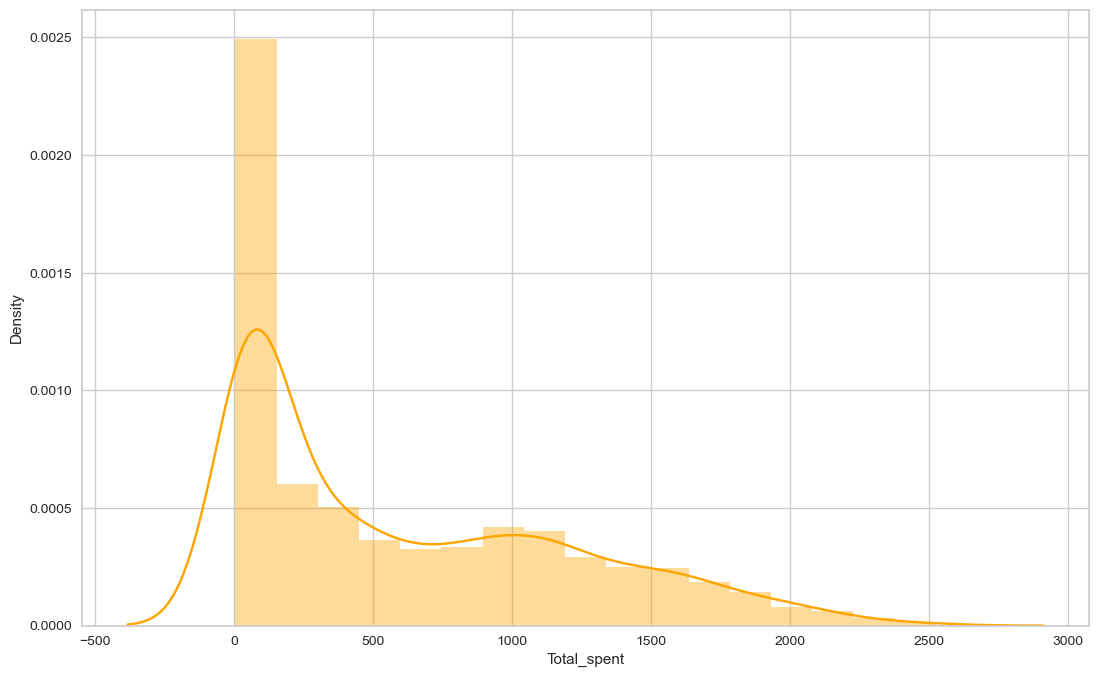

In [28]:
plt.figure(figsize=(13,8))
sns.distplot(df.Total_spent,color="orange")

In [29]:
#seeing the outliers with the help of boxplots
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=df['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=df['Total_spent'], notched=True, name='Total_spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()
     

In [30]:
num=["Income","Recency","Age","Total_spent"]
df.head(1)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   

   AcceptedCmp2  Complain  Response  Age  Total_spent  Living_category  \
0             0         0         1   67         1617            Alone   

   Children  Family_Size  Is_Parent  
0         0            1          0  

[1 rows x 29 columns]

In [31]:
def detect_outliers(d):
  for i in d:
    Q3,Q1=np.percentile(df[i], [75 ,25])
    IQR=Q3-Q1
    ul=Q3+1.5*IQR
    ll=Q1-1.5*IQR
    outliers = df[i][(df[i] > ul)|(df[i]<ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [32]:
detect_outliers(num)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    124
239    131
339    125
Name: Age, dtype: int64 

*** Total_spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Total_spent, dtype: int64 



In [33]:
#to remove some of the outliers to make the data more consistent
df=df[(df['Age']<100)]
df=df[(df['Income']<600000)]

In [34]:
#checking if thereis rarity in the categorical variable
#rarity is Categories that appear in a tiny proportion of the observations are rare.

categorical=[x for x in df.columns if df[x].dtype=="object"]

In [35]:
for x in categorical:
    print(df[x].value_counts(normalize=True) * 100)
    print()
    print()

Graduate         50.406872
Postgraduate     38.200723
Undergraduate    11.392405
Name: Education, dtype: float64


Partner    64.556962
Alone      35.443038
Name: Living_category, dtype: float64




In [36]:
#Encoding of the categorical variable since machine can only understand numerical values
df['Living_category']=df['Living_category'].map({'Alone':0,'Partner':1})
df['Education']=df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

<Axes: >

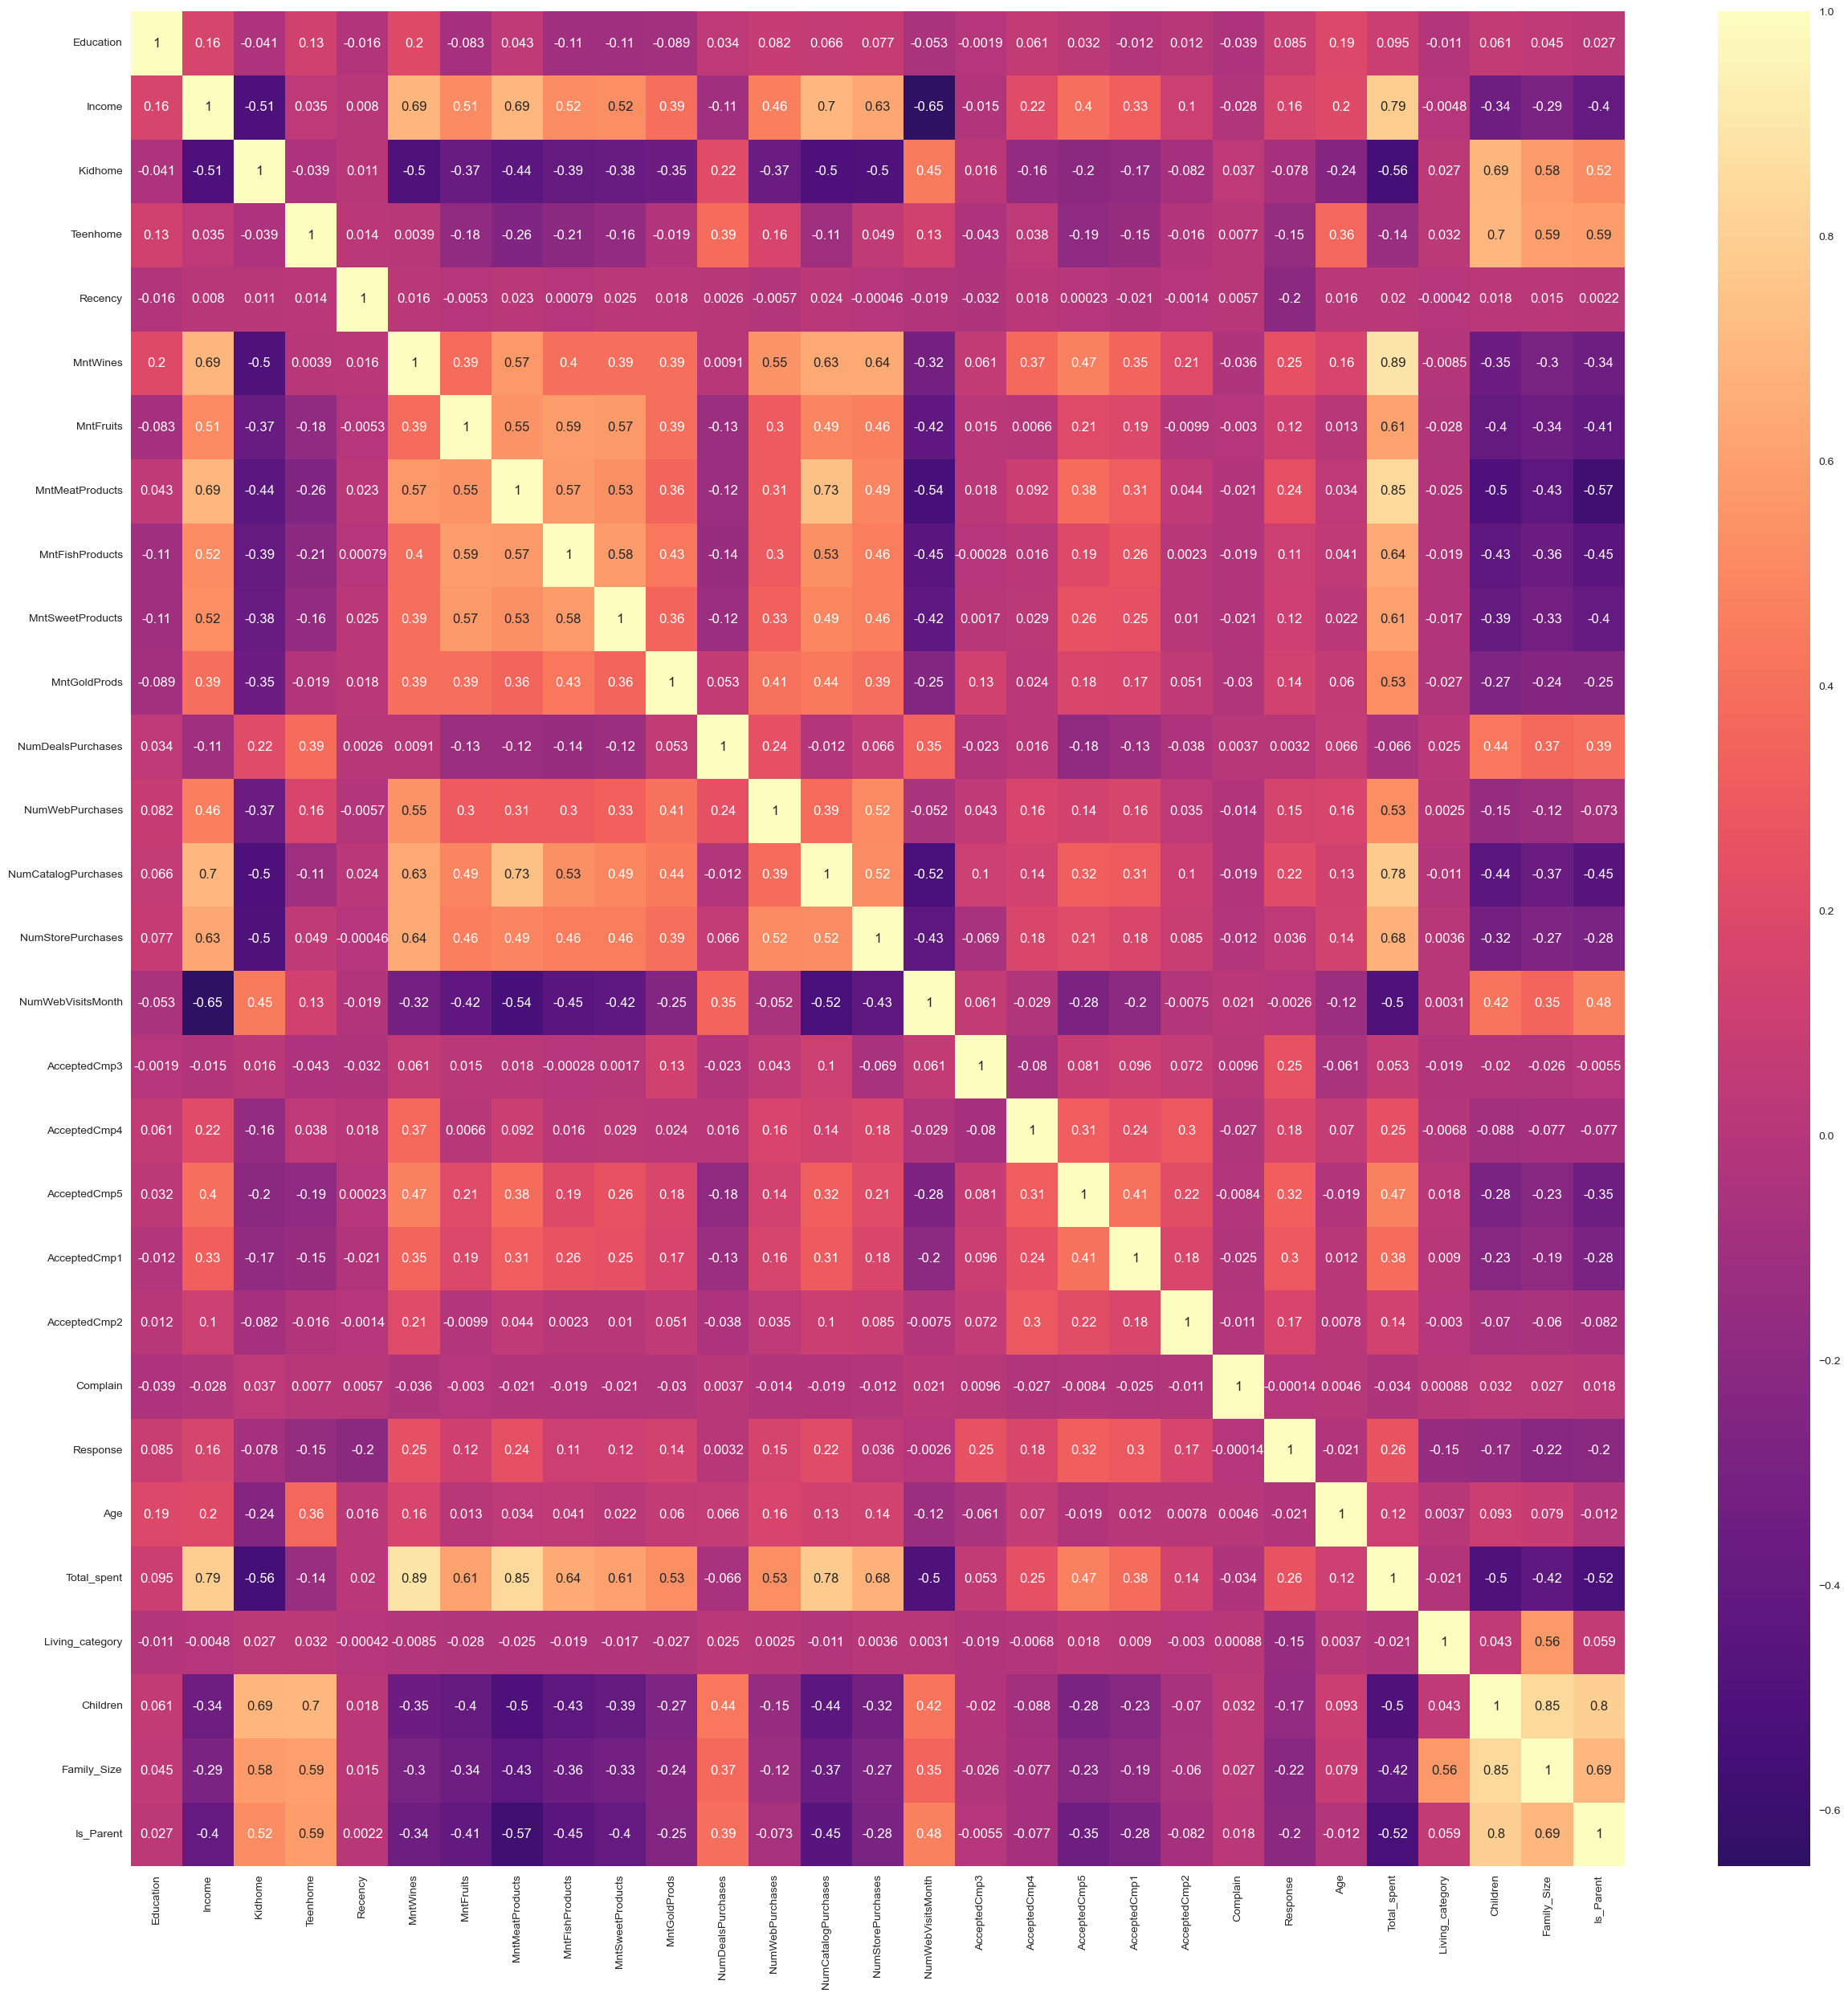

In [38]:
#correlation matrix representation usinf the sns heatmap
corr_matrix=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,cmap="magma",center=0)

In [39]:
df_copy=df.copy(deep=True)

In [40]:
cols_del=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
df=df.drop(cols_del, axis=1)

In [41]:
S_scaler=StandardScaler()
df=pd.DataFrame(S_scaler.fit_transform(df),columns=df.columns)

In [42]:
df.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebPurchases  \
0         1.690293         2.453472          1.483713  ...         1.426865   
1        -0.718230        -0.651004         -0.634019  ...        -1.126420   
2        -0.178542         1.339513         -0.147184  ...         1.426865   
3        -0.655787        -0.504911         -0.585335  ...        -0.761665   
4        -0.218684         0.152508         -0.001133  ...         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   

   Total_spent  Living_category  Children  Family_Size  Is_Parent  
0     1.676245        -1.349603 -1.264598    -1.758359  -1.581139  
1    -0.963297        -1.349603  1.404572     0.449070   0.632456  
2     0.280110         0.740959 -1.264598    -0.654644  -1.581139  
3    -0.920135         0.740959  0.069987     0.449070   0.632456  
4    -0.307562         0.740959  0.069987     0.449070   0.632456  

[5 rows x 22 columns]

In [43]:
#Dimensionality reduction using Principal Cmponent Analysis
p=PCA(n_components=3)
p.fit(df)

PCA(n_components=3)

In [44]:
arr=p.components_.T
arr

array([[ 1.13473057e-02,  1.40722415e-01, -5.06730279e-01],
       [ 2.79487061e-01,  1.78236149e-01, -7.54240122e-02],
       [-2.46222777e-01,  5.23532351e-03,  2.82707292e-01],
       [-9.87087777e-02,  4.62099886e-01, -1.51455321e-01],
       [ 3.52657716e-03,  1.62559035e-02,  3.59423156e-02],
       [ 2.55717065e-01,  2.09389587e-01, -1.16836244e-01],
       [ 2.38397852e-01,  1.10690056e-02,  2.53914005e-01],
       [ 2.85462090e-01,  9.91482879e-03,  7.64418296e-02],
       [ 2.48709824e-01,  2.28861079e-04,  2.54034897e-01],
       [ 2.37301807e-01,  2.16360200e-02,  2.57971759e-01],
       [ 1.88380378e-01,  1.23094768e-01,  1.99459988e-01],
       [-7.82601087e-02,  3.48736748e-01,  1.52364051e-01],
       [ 1.67559790e-01,  2.96774496e-01,  2.29433179e-02],
       [ 2.77349178e-01,  1.05954642e-01,  1.70060827e-02],
       [ 2.41542817e-01,  2.05482712e-01, -7.63494377e-03],
       [-2.25949424e-01,  4.60986900e-02,  9.11123847e-02],
       [ 3.84646947e-02,  2.34788829e-01

In [45]:
pd.DataFrame(arr,index=df.columns,columns=['arr1','arr2','arr3'])

arr1      arr2      arr3
Education            0.011347  0.140722 -0.506730
Income               0.279487  0.178236 -0.075424
Kidhome             -0.246223  0.005235  0.282707
Teenhome            -0.098709  0.462100 -0.151455
Recency              0.003527  0.016256  0.035942
MntWines             0.255717  0.209390 -0.116836
MntFruits            0.238398  0.011069  0.253914
MntMeatProducts      0.285462  0.009915  0.076442
MntFishProducts      0.248710  0.000229  0.254035
MntSweetProducts     0.237302  0.021636  0.257972
MntGoldProds         0.188380  0.123095  0.199460
NumDealsPurchases   -0.078260  0.348737  0.152364
NumWebPurchases      0.167560  0.296774  0.022943
NumCatalogPurchases  0.277349  0.105955  0.017006
NumStorePurchases    0.241543  0.205483 -0.007635
NumWebVisitsMonth   -0.225949  0.046099  0.091112
Age                  0.038465  0.234789 -0.428822
Total_spent          0.320099  0.133709  0.037593
Living_category     -0.027576  0.125507  0.300436
Children            -0.248087  0.339322  0.092561
Family_Size         -0.219730  0.346884  0.235164
Is_Parent           -0.242808  0.292274  0.082005

In [46]:
p.explained_variance_

array([8.27465625, 2.92091448, 1.43060623])

In [47]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499816])

In [48]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.375951
2               0.132709
3               0.064998

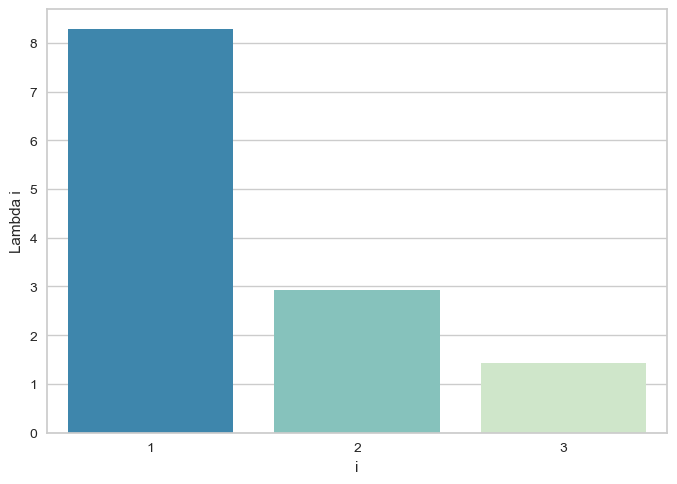

In [49]:
sns.barplot(x = list(range(1,4)),y=p.explained_variance_,palette='GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [50]:
data_PCA=pd.DataFrame(p.transform(df),columns=(['col1', 'col2', 'col3']))

In [51]:
data_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  1.927331e-17  2.876570 -5.915030 -2.548037 -0.784932  2.418554   
col2  2212.0  6.424437e-17  1.709068 -4.398450 -1.343426 -0.133342  1.243061   
col3  2212.0 -3.212219e-18  1.196080 -3.543026 -0.864648 -0.014855  0.823630   

           max  
col1  7.441146  
col2  6.248191  
col3  5.037076

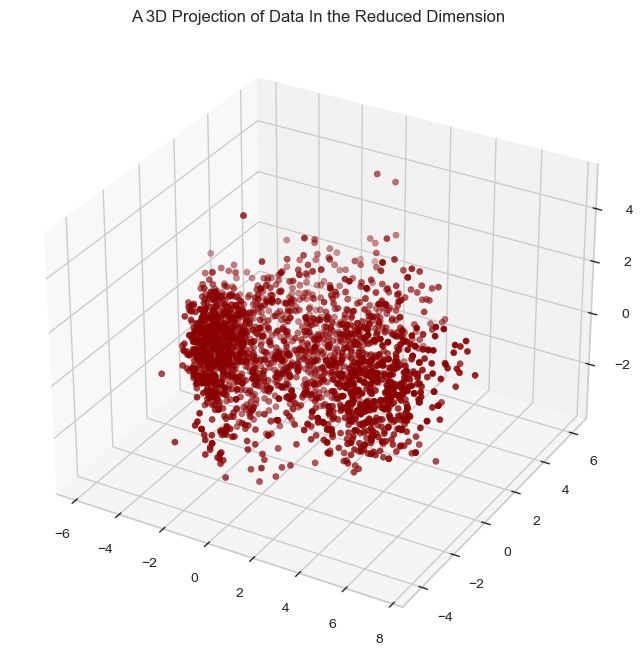

In [52]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

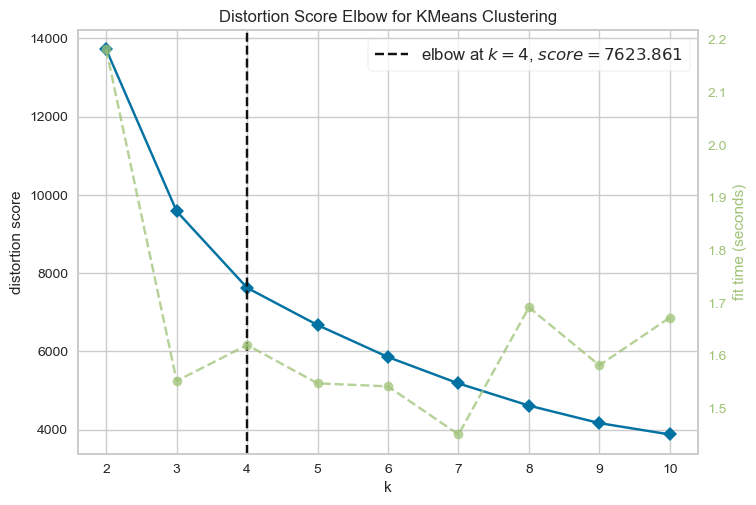

In [53]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [54]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df['Clusters'] = yhat_AC
df_copy['Clusters'] = yhat_AC
     

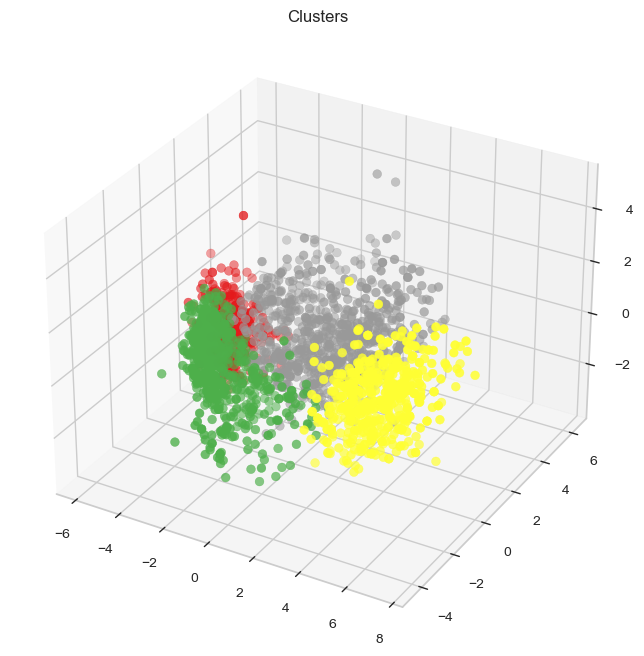

In [55]:
fig=plt.figure(figsize=(13,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=data_PCA['Clusters'],marker='o',cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

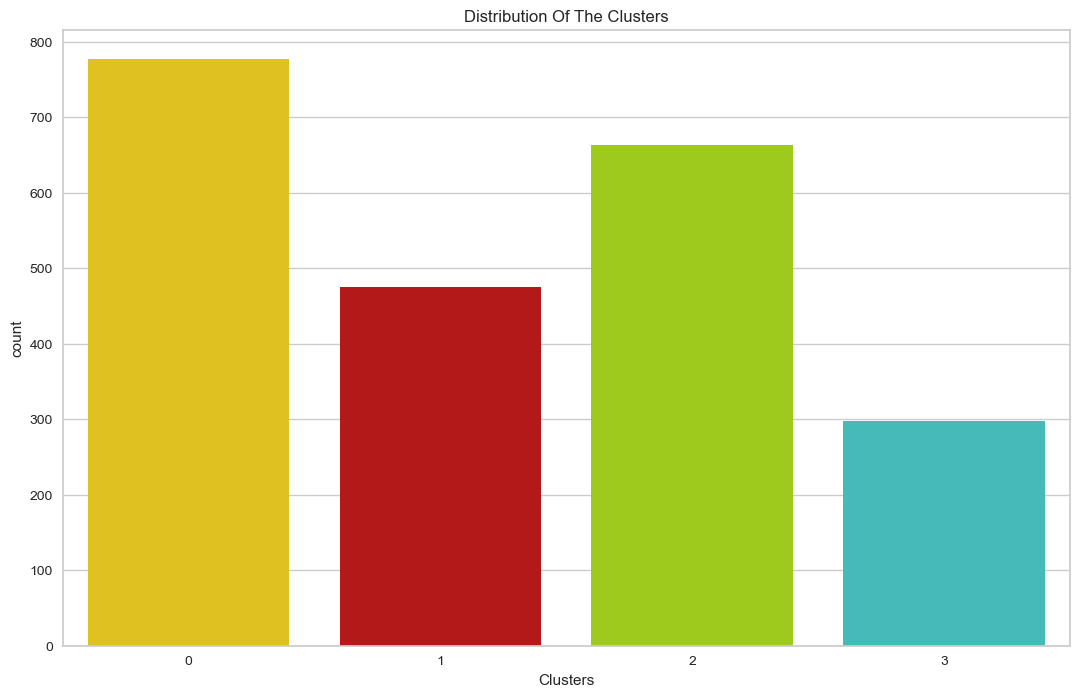

In [56]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

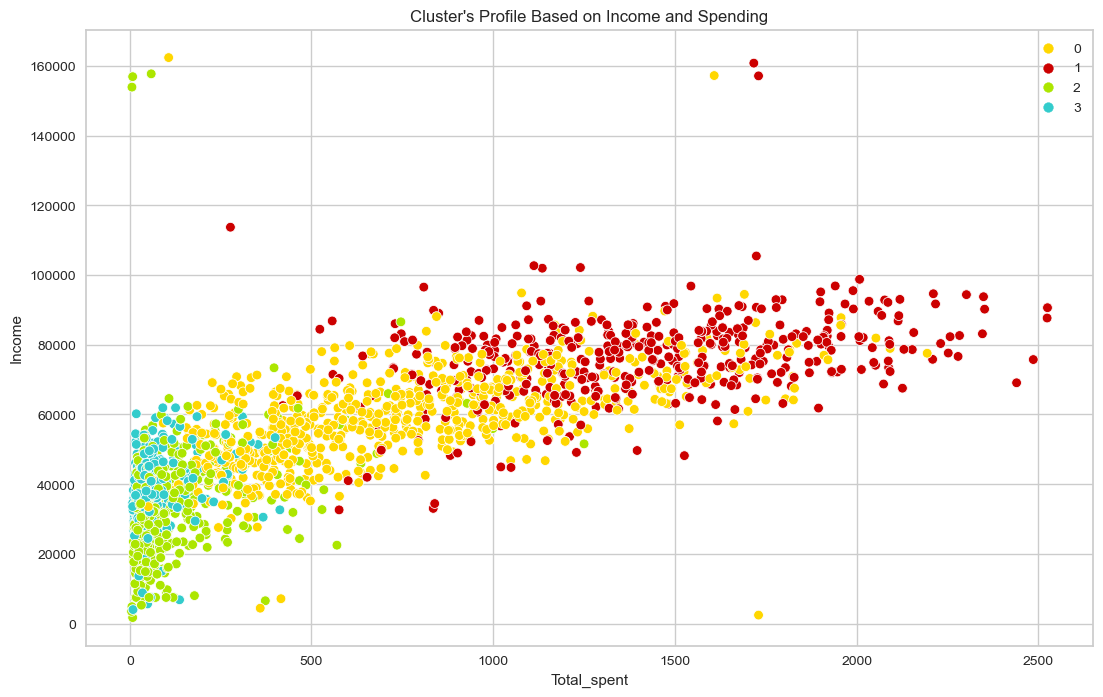

In [57]:
plt.figure(figsize=(13,8))
pl=sns.scatterplot(data=df_copy,x=df_copy['Total_spent'],y=df_copy['Income'],hue=df_copy['Clusters'],palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

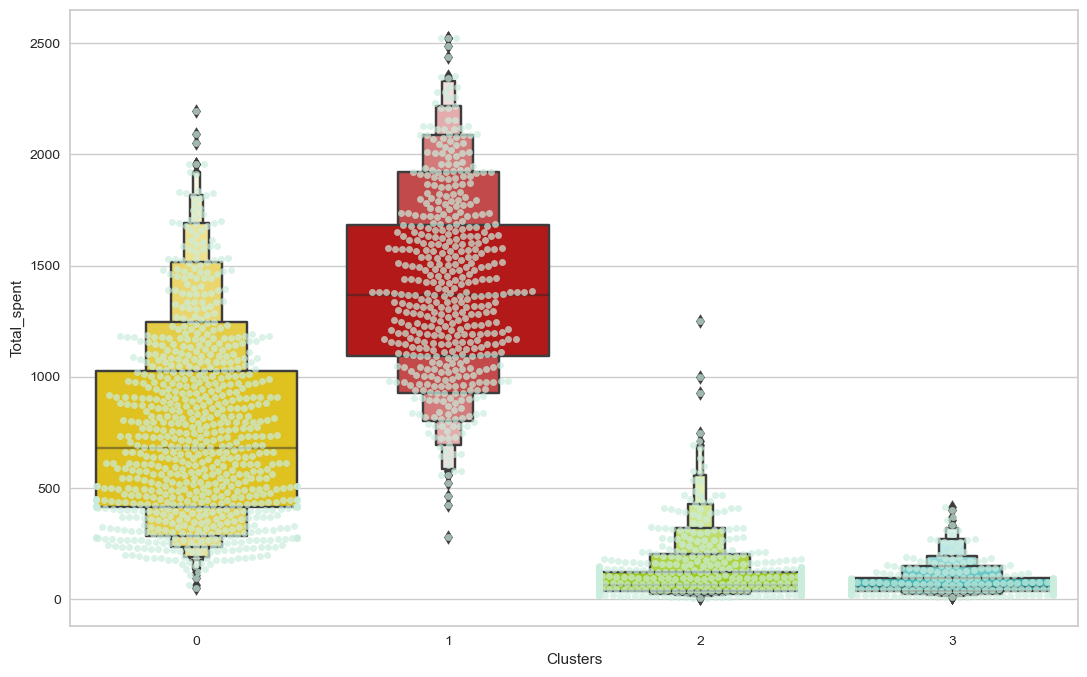

In [58]:
plt.figure(figsize=(13,8))
pl=sns.swarmplot(x=df_copy['Clusters'], y=df_copy['Total_spent'],color="#CBEDDD",alpha=0.7)
pl=sns.boxenplot(x=df_copy['Clusters'], y=df_copy['Total_spent'],palette=pal)
plt.show();

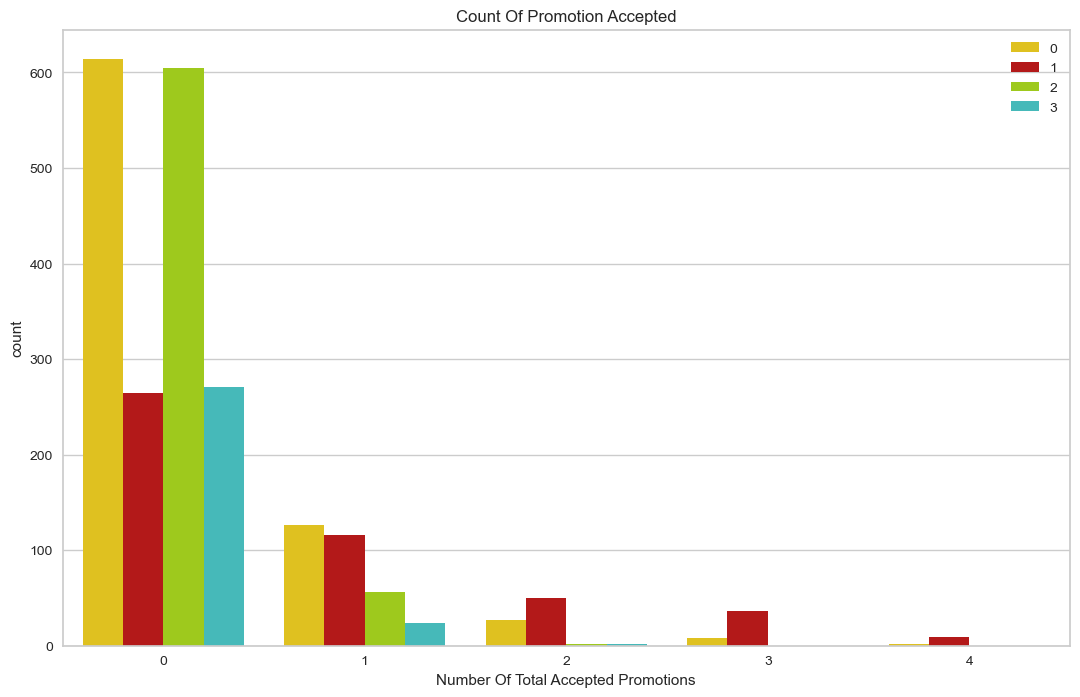

In [59]:
df_copy['Total_Promos']=df_copy['AcceptedCmp1']+ df_copy['AcceptedCmp2']+ df_copy['AcceptedCmp3']+ df_copy['AcceptedCmp4']+ df_copy['AcceptedCmp5']
plt.figure(figsize=(13,8))
pl=sns.countplot(x=df_copy['Total_Promos'],hue=df_copy['Clusters'],palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();
     

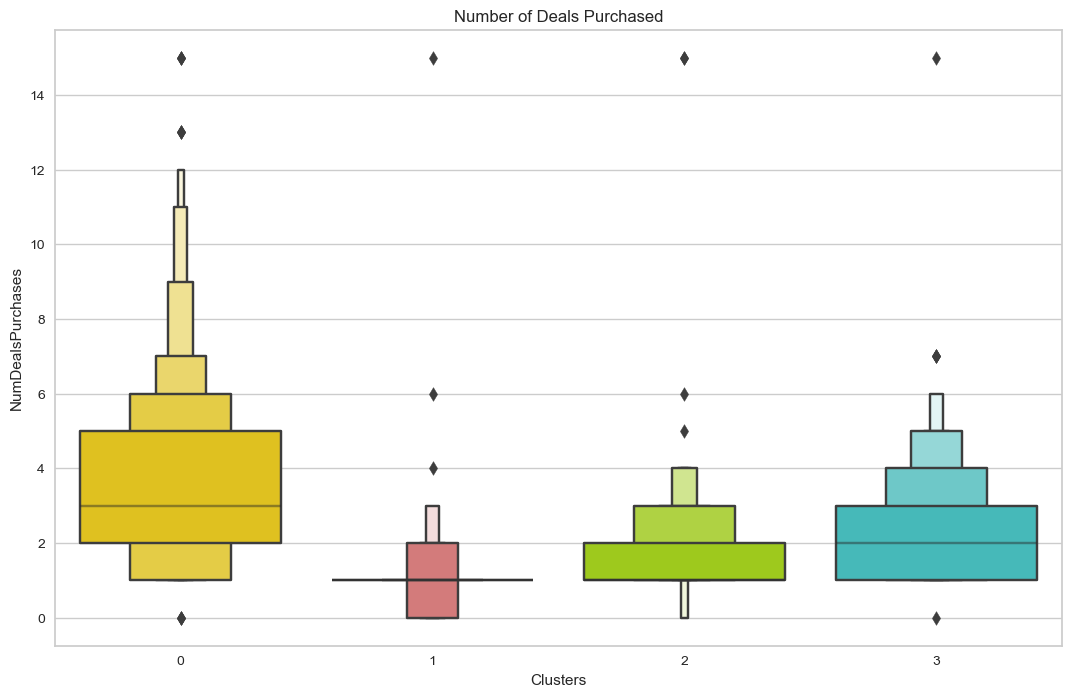

In [60]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=df_copy['NumDealsPurchases'],x=df_copy['Clusters'],palette=pal)
pl.set_title('Number of Deals Purchased');

<Figure size 1300x800 with 0 Axes>

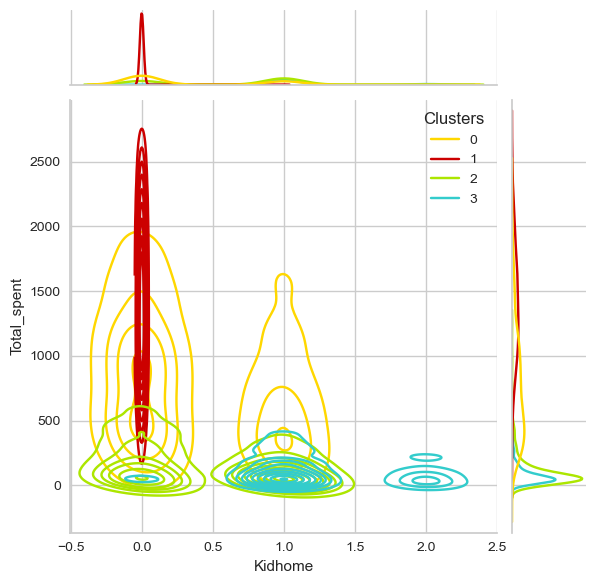

<Figure size 1300x800 with 0 Axes>

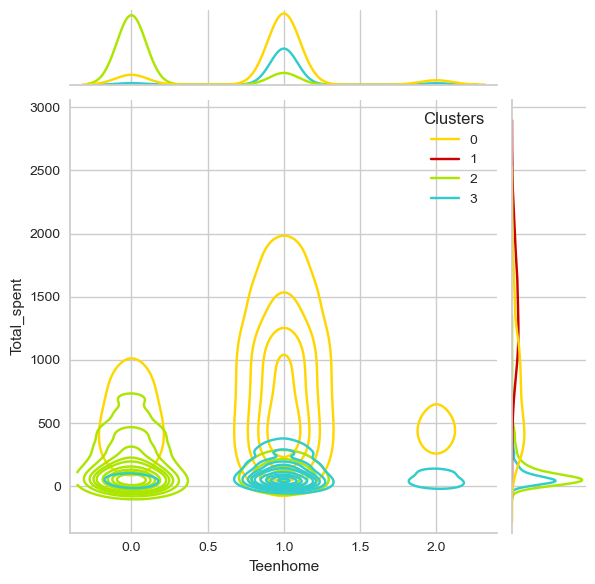

<Figure size 1300x800 with 0 Axes>

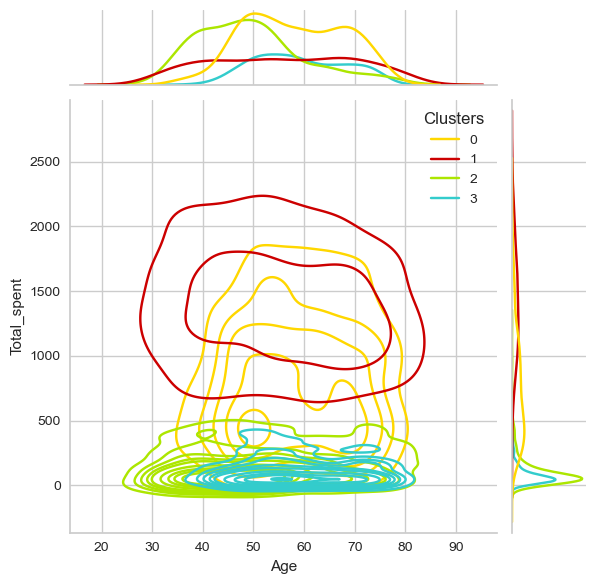

<Figure size 1300x800 with 0 Axes>

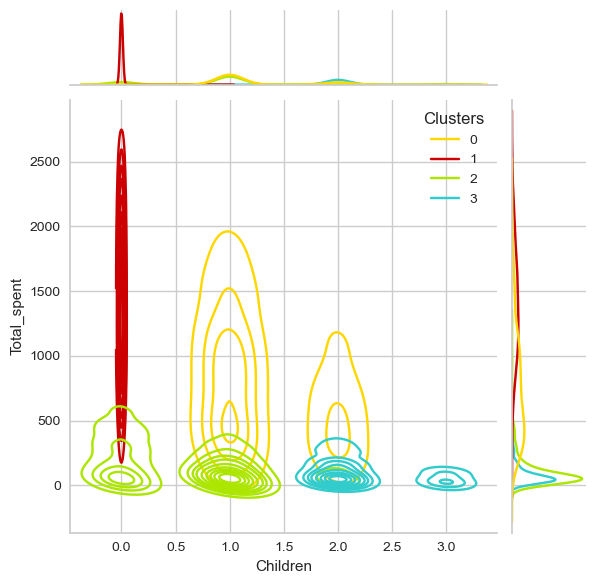

<Figure size 1300x800 with 0 Axes>

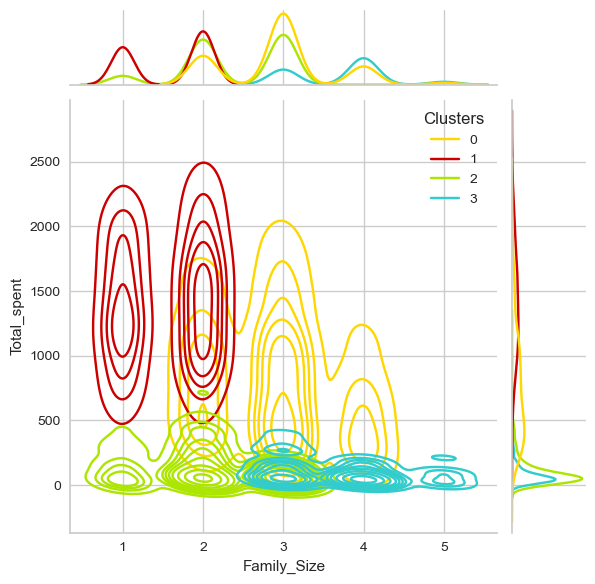

<Figure size 1300x800 with 0 Axes>

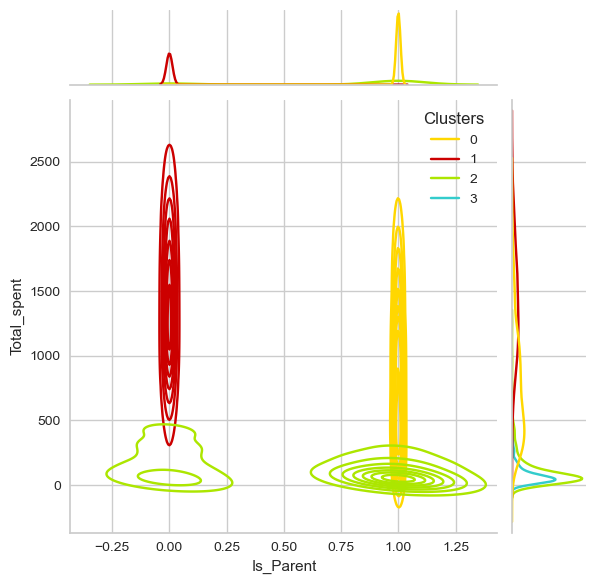

<Figure size 1300x800 with 0 Axes>

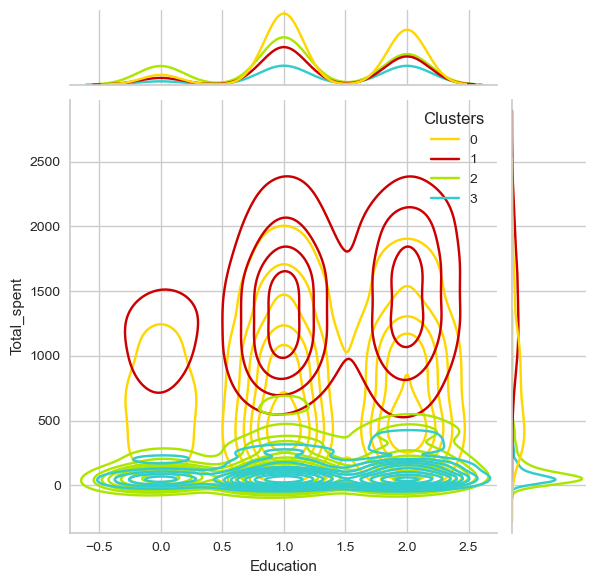

<Figure size 1300x800 with 0 Axes>

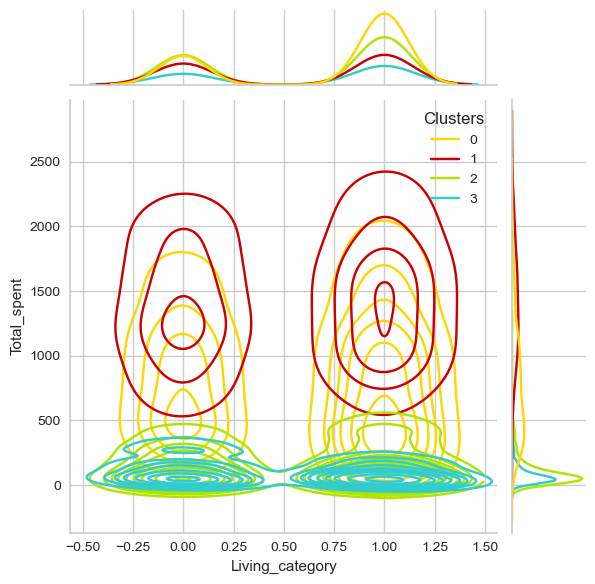

In [62]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_category']
for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=df_copy[i],y=df_copy['Total_spent'], hue=df_copy['Clusters'], kind='kde', palette=pal);
     

<div>
    <h2 style="color:#ffda03;">Cluster 0:</h2>
    <ol>
        <li>Defenitly a parent</li>
        <li>There are 2 to 4 people in the family</li>
        <li>Has 1 or 2 children and majorly of them are teenagers</li>
        <li>Covers large range of age </li>
        <li>Most of them are single parents </li>
    </ol>  
</div>
<div>
    <h2 style="color:#ff0000;">Cluster 1:</h2>
    <ol type="I">
        <li>Not a parent</li>
        <li>At max 2 people are there in the family</li>
        <li>Number of single people are little less than couples</li>
        <li>Covers large range of Age </li>
    </ol>  
</div>
<div>
    <h2 style="color:#86dc3d;">Cluster 2:</h2>
    <ol type="I">
        <li>The family has maximum of 3 people</li>
        <li>Major chunk of them are a parent</li>
        <li>Have only one kid or neither(That kid is not a teenager)</li>
        <li>Most of these people are young</li>
    </ol>  
</div>
<div>
    <h2 style="color:#00bbbc;">Cluster 3:</h2>
    <ol type="I">
        <li>Definitely a parent</li>
        <li>Family size ranges from 3 to 5 people</li>
        <li>Have 2 or 3 children and majority of them are teenager</li> 
        <li>Covers a large range of Age but relatively most of them are old</li>
    </ol>  
</div>